Hasil Backward Difference:
[ 2. -3.  6. -4. -4.]


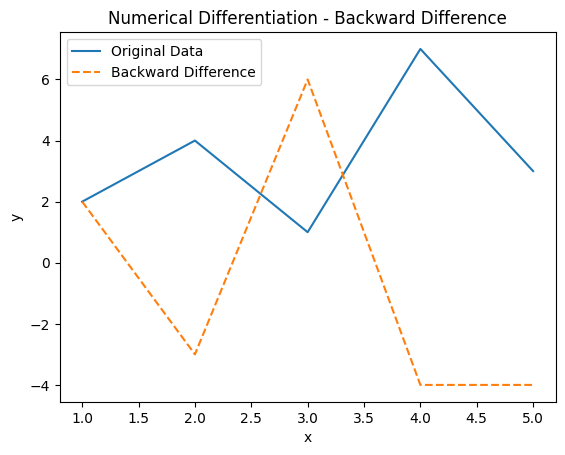

In [5]:
import matplotlib.pyplot as plt

# Contoh input x dan y
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 1, 7, 3])

# Menggunakan fungsi backward_difference
dy_backward = backward_difference(x, y)

# Menampilkan hasil
print("Hasil Backward Difference:")
print(dy_backward)

# Visualisasi hasil
plt.plot(x, y, label='Original Data')
plt.plot(x, dy_backward, label='Backward Difference', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical Differentiation - Backward Difference')
plt.show()


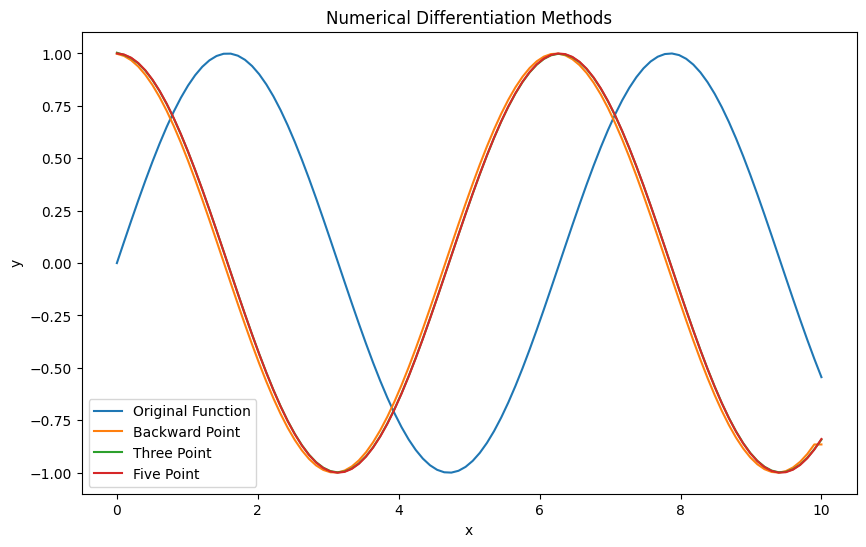

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def backward_difference(x, y):
    if x.size < 2 or y.size < 2:
        raise ValueError("'x' and 'y' arrays must have 2 values or more.")

    if x.size != y.size:
        raise ValueError("'x' and 'y' must have the same size.")

    def dy_difference(h, y0, y1):
        return (y1 - y0) / h

    n = x.size
    dy = np.zeros(n)
    for i in range(0, n):
        if i == n - 1:
            hx = x[i] - x[i - 1]
            dy[i] = dy_difference(-hx, y[i], y[i - 1])
        else:
            hx = x[i + 1] - x[i]
            dy[i] = dy_difference(hx, y[i], y[i + 1])

    return dy

def three_point(x, y):
    if x.size < 3 or y.size < 3:
        raise ValueError("'x' and 'y' arrays must have 3 values or more.")

    if x.size != y.size:
        raise ValueError("'x' and 'y' must have the same size.")

    def dy_mid(h, y0, y2):
        return (1 / (2 * h)) * (y2 - y0)

    def dy_end(h, y0, y1, y2):
        return (1 / (2 * h)) * (-3 * y0 + 4 * y1 - y2)

    hx = x[1] - x[0]
    n = x.size
    dy = np.zeros(n)
    for i in range(0, n):
        if i == 0:
            dy[i] = dy_end(hx, y[i], y[i + 1], y[i + 2])
        elif i == n - 1:
            dy[i] = dy_end(-hx, y[i], y[i - 1], y[i - 2])
        else:
            dy[i] = dy_mid(hx, y[i - 1], y[i + 1])

    return dy

def five_point(x, y):
    if x.size < 6 or y.size < 6:
        raise ValueError("'x' and 'y' arrays must have 6 values or more.")

    if x.size != y.size:
        raise ValueError("'x' and 'y' must have the same size.")

    def dy_mid(h, y0, y1, y3, y4):
        return (1 / (12 * h)) * (y0 - 8 * y1 + 8 * y3 - y4)

    def dy_end(h, y0, y1, y2, y3, y4):
        return (1 / (12 * h)) * \
            (-25 * y0 + 48 * y1 - 36 * y2 + 16 * y3 - 3 * y4)

    hx = x[1] - x[0]
    n = x.size
    dy = np.zeros(n)
    for i in range(0, n):
        if i in (0, 1):
            dy[i] = dy_end(hx, y[i], y[i + 1], y[i + 2], y[i + 3], y[i + 4])
        elif i in (n - 1, n - 2):
            dy[i] = dy_end(-hx, y[i], y[i - 1], y[i - 2], y[i - 3], y[i - 4])
        else:
            dy[i] = dy_mid(hx, y[i - 2], y[i - 1], y[i + 1], y[i + 2])

    return dy

# Generate sample data
x_values = np.linspace(0, 10, 100)
y_values = np.sin(x_values)

# Calculate derivatives
dy_backward = backward_difference(x_values, y_values)
dy_three_point = three_point(x_values, y_values)
dy_five_point = five_point(x_values, y_values)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Original Function')
plt.plot(x_values, dy_backward, label='Backward Point')
plt.plot(x_values, dy_three_point, label='Three Point')
plt.plot(x_values, dy_five_point, label='Five Point')
plt.legend()
plt.title('Numerical Differentiation Methods')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
